In [1]:
%matplotlib inline
from pathlib import Path
from imgseries import ImgSeries, ContourTracking, ContourTrackingResults

**NOTE**: This notebook only shows the non-interactive ContourTracking tools. See *ContourTracking_Interactive.ipynb* for interactive options.

**NOTE**: the main (numbered) sections are independent of each other

In [2]:
# Define where images are stored, here distributed among two folders
basefolder = Path('../data/')
folders = [basefolder / folder for folder in ('img1', 'img2')]

# 1) Minimal analysis

## Load images

In [3]:
images = ImgSeries(folders, savepath=basefolder)

# load pre-defined transforms (see ImgSeries for how to define those)
images.load_transforms('for-tests-do-not-modify/Img_Transform')
images

ImgSeries, data length [50]
-- corrections: []
-- transforms: ['rotation', 'crop']
from FileSeries in ../data / ['img1', 'img2'], 50 files]

## Analysis

In [4]:
# Save results in untracked folder to avoid git tracking test files
ct = ContourTracking(images, savepath='../data/untracked_data/')

The line below assumes that contours to follow have already been defined and saved in the metadata file (see details further below)

In [5]:
# Load pre-defined contours, see below how to define them directly
ct.contour_selection.load('../for-tests-do-not-modify/Img_ContourTracking')

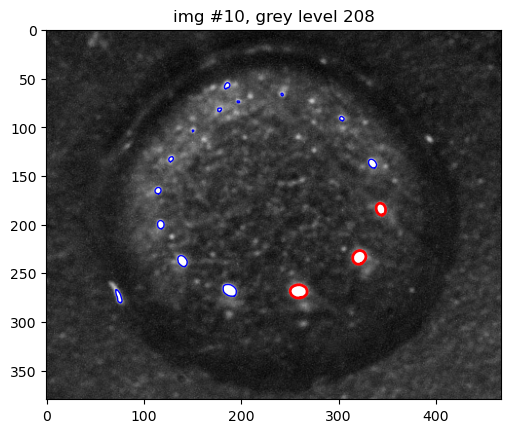

<Axes: title={'center': 'img #10, grey level 208'}>

In [6]:
ct.contour_selection.show()

Now, run analysis on these zones.

In [7]:
ct.run()

100%|██████████| 50/50 [00:00<00:00, 156.81it/s]


Results are stored in the `results.data['properties']` attribute, which is a pandas DataFrame (times are automatically extracted from image creation date, but can be modified, see further below)). `x, y` represent position, `p` perimeter and `a` signed area (see **imgbasics** package)

*Note*: if contour detection fails at some point, `data` will contain `NaN` (`numpy.nan`) at the corresponding locations.

*Note*: by default, the full coordinates of the contours are also stored in `results.data['coordinates']`. If this is too heavy, `ContourTracking` can be instanciated with the option `save_contours=False`

In [8]:
ct.results.metadata

{'path': '/Users/olivier.vincent/Python-OV/imgseries/examples/data/untracked_data',
 'folders': ['../img1', '../img2'],
 'contour selection': {'properties': {'contour 0': {'centroid': [258.91971771176395,
     268.56105261167784],
    'perimeter': 49.21791294683056,
    'area': -185.55859760532715},
   'contour 1': {'centroid': [321.1994688210141, 233.57527180813884],
    'perimeter': 43.40386973919024,
    'area': -147.45162297356632},
   'contour 2': {'centroid': [343.46649093385753, 183.99377183456244],
    'perimeter': 34.7021950664108,
    'area': -92.59459704615058}},
  'level': 208,
  'image': 10},
 'transforms': {'flicker': False,
  'shaking': False,
  'grayscale': {},
  'rotation': {'angle': 22.765009107511496},
  'crop': {'zone': [159, 171, 467, 380]},
  'filter': {},
  'subtraction': {},
  'threshold': {}}}

In [9]:
ct.results.data['table'].tail()

,folder,filename,time (unix),x_00,y_00,p_00,a_00,x_01,y_01,p_01,a_01,x_02,y_02,p_02,a_02
num,,,,,,,,,,,,,,,
45,img2,img-00655.png,1.696408e+09,258.885447,269.593477,188.781939,49.524293,322.703719,234.045388,155.564424,44.565320,345.343625,183.533928,93.782496,34.951921
46,img2,img-00656.png,1.696408e+09,259.013643,269.674866,189.546955,49.617833,323.000766,234.059633,156.597158,44.759353,345.730018,183.471015,94.742974,35.121972
47,img2,img-00657.png,1.696408e+09,259.255530,269.854956,191.200223,49.818371,323.398502,234.166957,157.046994,44.777525,346.216530,183.428858,95.360302,35.214324
48,img2,img-00658.png,1.696408e+09,259.339899,270.001612,191.448587,49.851700,323.641501,234.240019,157.846517,44.867446,346.509998,183.374329,95.119155,35.191625
49,img2,img-00659.png,1.696408e+09,259.446994,270.182794,191.524134,49.844799,323.925460,234.362734,158.400596,45.012087,346.811481,183.330396,95.957076,35.380092


In [10]:
ct.results.data['contours'][13][2].properties.data

{'centroid': (341.649203317, 183.58547781678968),
 'perimeter': 34.52142720992823,
 'area': 91.64946266095316}

Plot perimeters of all detected particles (contours) as a function of time:

<Axes: xlabel='time (unix)'>

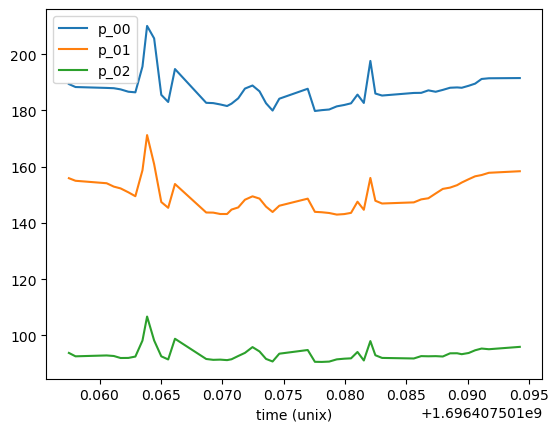

In [11]:
ct.results.data['table'].set_index('time (unix)').filter(like='p').plot()

Save data in a tsv (tab-separated value) file, using default filename (filename can be set as a parameter if necessary, see further below). Metadata including contour info, path info, and code version info is also saved in a .json file at the same time. Full (raw) contour data is also saved if required.

Before saving, make sure the timing info is correct for all images. If not, correct timing info, re-run the analysis, and call `results.save()`.

In [12]:
ct.results.save()

# 2) Defining and viewing contours

See Interactive notebook

# 3) Analyze only subset of images

See **Examples_GreyLevels.ipynb**, and replace:
- `GreyLevel` →  `ContourTracking`
- `zones` →  `contours`

# 4) Criteria on displacement / relative area variations

In order to put criteria on maximum displacements (pixels) or relative area variations of the contour, use 

In [13]:
# max 10 px displacement from one image to the other
ct = ContourTracking(images, tolerance_displacement=10)
# max 10% area variation from one image to the other
ct = ContourTracking(images, tolerance_area=0.1)

# 5) Load analysis data a posteriori

## Load results without images

In [14]:
# Here, the savepath is where the results have been stored with save()
results = ContourTrackingResults(savepath='../data/for-tests-do-not-modify/')

results.load()
results.data['table'].head()

,folder,filename,time (unix),x_00,y_00,p_00,a_00,x_01,y_01,p_01,a_01,x_02,y_02,p_02,a_02
num,,,,,,,,,,,,,,,
0,img1,img-00610.png,1.696408e+09,258.922538,269.803099,189.384510,49.592486,322.867664,234.172988,155.923057,44.661887,345.574693,183.603678,93.803725,34.944828
1,img1,img-00611.png,1.696408e+09,258.823898,269.550702,188.334363,49.495755,322.614522,234.015463,155.005937,44.540109,345.201740,183.521869,92.596991,34.732783
2,img1,img-00612.png,1.696408e+09,258.720674,269.438545,188.017269,49.431836,322.337903,233.972817,154.129914,44.494876,344.847525,183.593275,92.907801,34.799843
3,img1,img-00613.png,1.696408e+09,258.556098,269.228856,187.916396,49.408665,322.011229,233.818076,152.932206,44.411523,344.485038,183.570759,92.710149,34.746201
4,img1,img-00614.png,1.696408e+09,258.421522,269.035031,187.499910,49.420146,321.688862,233.702861,152.293175,44.322010,344.164877,183.544379,91.997408,34.641782


In [15]:
results.data['contours'][12][2].properties.data

{'centroid': (343.45235439781493, 183.4538097913838),
 'perimeter': 35.77460532656973,
 'area': 98.84080102582615}

In [16]:
results.metadata

{'path': '/Users/olivier.vincent/Python-OV/imgseries/examples/data/untracked_data',
 'folders': ['../img1', '../img2'],
 'contour selection': {'properties': {'contour 0': {'centroid': [258.91971771176395,
     268.56105261167784],
    'perimeter': 49.21791294683056,
    'area': -185.55859760532715},
   'contour 1': {'centroid': [321.1994688210141, 233.57527180813884],
    'perimeter': 43.40386973919024,
    'area': -147.45162297356632},
   'contour 2': {'centroid': [343.46649093385753, 183.99377183456244],
    'perimeter': 34.7021950664108,
    'area': -92.59459704615058}},
  'level': 208,
  'image': 10},
 'transforms': {'flicker': False,
  'shaking': False,
  'grayscale': {},
  'rotation': {'angle': 22.765009107511496},
  'crop': {'zone': [159, 171, 467, 380]},
  'filter': {},
  'subtraction': {},
  'threshold': {}},
 'time (utc)': '2025-10-27 15:51:30',
 'code version': {'skimage': {'status': 'not a git repository',
   'tag': 'v0.25.0'},
  'imgseries': {'hash': 'd69321c9adb2b678f46e4

In [17]:
results.data['contours'][12][1].coordinates.x

array([321.        , 320.        , 319.28571429, 319.        ,
       318.        , 317.13953488, 317.        , 316.        ,
       315.86885246, 315.16666667, 315.        , 314.7804878 ,
       314.48837209, 314.46268657, 314.47142857, 314.43373494,
       314.78571429, 315.        , 315.30612245, 315.82      ,
       316.        , 316.80769231, 317.        , 317.86666667,
       318.        , 319.        , 319.87878788, 320.        ,
       321.        , 322.        , 323.        , 324.        ,
       324.30952381, 325.        , 325.65853659, 326.        ,
       326.85714286, 327.        , 327.46428571, 327.8245614 ,
       328.        , 328.14814815, 328.33333333, 328.16      ,
       328.        , 327.86792453, 327.51851852, 327.        ,
       326.97916667, 326.25      , 326.        , 325.33333333,
       325.        , 324.        , 323.83783784, 323.        ,
       322.        , 321.07142857, 321.        ])

# 6) Connect results to image series (e.g. for inspection/visualization)

In [18]:
images = ImgSeries(folders, savepath=basefolder)
ct = ContourTracking(images)

# Line below is equivalent to call results.load() and images.load_transforms,
# except that the transforms are taken directly from the results metadata.
ct.regenerate(filename='for-tests-do-not-modify/Img_ContourTracking')

In [19]:
print('Image Crop -------------------------', ct.img_series.crop.zone)
print('Image Crop (same as above) ---------', ct.results.metadata['transforms']['crop'].get('zone', ()))
print('')
print('Image Rotation ---------------------', ct.img_series.rotation.data)
print('Image Rotation (same as above) -----', ct.results.metadata['transforms']['rotation'])
print('')
print('Contour position -------------------', ct.contour_selection.data['properties']['contour 2'])
print('Contour position (same as above) ---', ct.results.metadata['contour selection']['properties']['contour 2'])

ct.results.data['table'].head()

Image Crop ------------------------- [159, 171, 467, 380]
Image Crop (same as above) --------- [159, 171, 467, 380]

Image Rotation --------------------- {'angle': 22.765009107511496}
Image Rotation (same as above) ----- {'angle': 22.765009107511496}

Contour position ------------------- {'centroid': [343.46649093385753, 183.99377183456244], 'perimeter': 34.7021950664108, 'area': -92.59459704615058}
Contour position (same as above) --- {'centroid': [343.46649093385753, 183.99377183456244], 'perimeter': 34.7021950664108, 'area': -92.59459704615058}


,folder,filename,time (unix),x_00,y_00,p_00,a_00,x_01,y_01,p_01,a_01,x_02,y_02,p_02,a_02
num,,,,,,,,,,,,,,,
0,img1,img-00610.png,1.696408e+09,258.922538,269.803099,189.384510,49.592486,322.867664,234.172988,155.923057,44.661887,345.574693,183.603678,93.803725,34.944828
1,img1,img-00611.png,1.696408e+09,258.823898,269.550702,188.334363,49.495755,322.614522,234.015463,155.005937,44.540109,345.201740,183.521869,92.596991,34.732783
2,img1,img-00612.png,1.696408e+09,258.720674,269.438545,188.017269,49.431836,322.337903,233.972817,154.129914,44.494876,344.847525,183.593275,92.907801,34.799843
3,img1,img-00613.png,1.696408e+09,258.556098,269.228856,187.916396,49.408665,322.011229,233.818076,152.932206,44.411523,344.485038,183.570759,92.710149,34.746201
4,img1,img-00614.png,1.696408e+09,258.421522,269.035031,187.499910,49.420146,321.688862,233.702861,152.293175,44.322010,344.164877,183.544379,91.997408,34.641782


Once the analysis is regenerated, all the tools associated with images (inspection, showing, animation, etc.) are available:

(<Axes: title={'center': 'img #25'}>,)

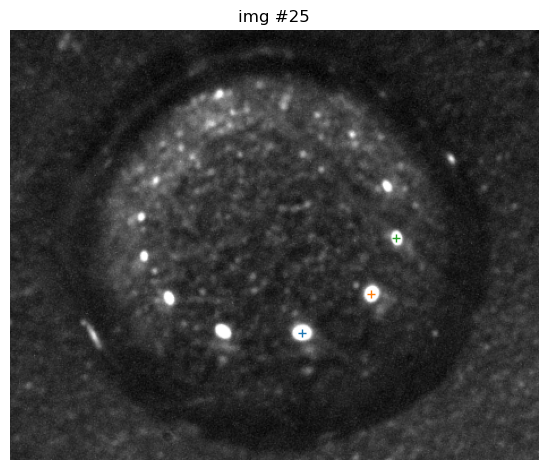

In [20]:
ct.show(num=25)

In [21]:
ct.results.data['coordinates']['num_00007']

KeyError: 'coordinates'